# Final Project Submission

* Student name: Lucas Kelly
* Student pace: self paced
* Instructor name: Eli Thomas
* Blog post URL: https://lucaskellydataportfolio.weebly.com/data-science-blog/cnn-glossary

# Objective:

Create a computer vison model using a convolutional neural network to classify images of fashion items from the MNIST Fashion dataset with an accuracy score above 90%.

# Process and outline using the OSEMN Model

This project followed the OSEMN Model in order to organize and prioritize the work involved. This model is one that is common in the practice of data science and allows the scientist to most clearly tell the story of creating the final model. 

## Part 1: Obtaining the data

The MNIST Fashion data set was created for a number of reasons. First, the original MNIST dataset of handwritten numerical digits has been used countless times in a young data scientists career, that the models created to generate the best results were recycled over and over again. With a fresh, new dataset, data scientists can work a little more outside of the mainstream. Second, the MNIST Fashion dataset adds more of a challenge in creating a neural network. Finally, the classification of clothing images using computer vision, falls closer in line with modern industry needs. The work that is done on the MNIST Fashion data can be applied to many online clothing companies and real-world industry needs. 

A more thorough explanation of why this data was created can be found on the Zalando Research page (https://github.com/zalandoresearch/fashion-mnist) and at the Kaggle Competition homepage (https://www.kaggle.com/zalando-research/fashionmnist). This data was downloaded for this project from the Kaggle website. 

For more on how this project is translateable to industry tasks, see the blog post below:

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

## Part 2: Scrubing the data

Most of the data in this dataset comes preped and scrubbed. With a training set of 60,000 images and a test set of 10,000 images each coming in as a 28 x 28 image, the dataset is ready to model with a few minor adjustments needed when preparing for pre-trained networks (See Part 4.)

## Part 3: Exploring the data

This step allows us to see how the data is formated, how many images in each category we are dealing with, how the images look in real life, and what we can do to get a better grasp on what we're working with. 

## Part 4: Modeling

As modeling is always an interative process, we go through a series of initial baseline models to test and evaluate the needed structure and architecture of our network. From there, we use a form of hyperparameter tuning using a library called Talos (https://github.com/autonomio/talos) to find the best optimizer and batch-size for our final model. 

## Part 5: Interpret

Finally, we look at how the models compare, using the accuracy metric to decipher which model had the most success in categorizing the test and validation images. 

# -----------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------

### Libraries

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, ZeroPadding2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from keras import utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization,LeakyReLU
from keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras import Model
from sklearn.metrics import confusion_matrix
import talos
from keras import optimizers, callbacks
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam, Adadelta, RMSprop, SGD

In [4]:
from PIL import Image as pil_image

### Functions

In [253]:
# This is a function to help 
# Credit to Matthew Sparr: 
# https://nbviewer.jupyter.org/github/matthewsparr/Hiragana-Deep-Learning/blob/master/final.ipynb

def plot_training(mod):
# Plot training & validation accuracy values
    plt.plot(mod.history['acc'])
    plt.plot(mod.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

# Plot training & validation loss values
    plt.plot(mod.history['loss'])
    plt.plot(mod.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

## Part 1: Obtaining the data

### Loading the data

The MNIST Fashion dataset comes organized and scrubbed for the most part. Now, we just have to load it and divide it into test, train and validation data sets. 

In [62]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


## Part 2: Scrubing the data

In [254]:
# Train/Test/Split

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [64]:
x_train.shape

(60000, 28, 28)

In [65]:
x_test.shape

(10000, 28, 28)

In [66]:
y_train.shape

(60000,)

In [67]:
y_test.shape

(10000,)

### Normalize the data

In [255]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [256]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Part 3: Exploring the data

We can see that each individual category of clothing item contains an equal 6000 images. 

In [252]:
train['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

### View a sample image

We can use this to view our images at random. Viewing different images will allow us to see what our model is being trained on and where errors may occur. 

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


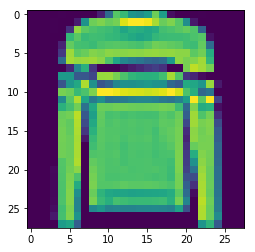

In [72]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = (y_train[img_index])
label_index = label_index.astype(int)
# Print the label, for example 2 Pullover
print("y = " + str(label_index) + " " + fashion_mnist_labels[label_index])
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Part 4: Modeling

We know that modeling is an iterative process. You will see below how tweaking and tuning models, starting with a baseline, can give us a great sense of what needs to be improved in our CNN. 

### Model 1: Initial Baseline Model

In [35]:
# We have a 28 x 28 image
image_shape = (28,28,1)

# Building model 1: 2 conv layers, 1 hidden layer
model1 = Sequential()

model1.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation = 'relu', input_shape=image_shape))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Conv2D(filters=32, kernel_size=2, padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size=2))

model1.add(Flatten())
model1.add(Dense(256, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))

# Preview the model summary
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               401664    
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

In [36]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
history1 = model1.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(x_valid,y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 91s 2ms/step - loss: 0.4222 - acc: 0.8487 - val_loss: 0.3014 - val_acc: 0.8980
Epoch 2/5
55000/55000 [==============================] - 88s 2ms/step - loss: 0.2818 - acc: 0.8960 - val_loss: 0.2646 - val_acc: 0.9034
Epoch 3/5
55000/55000 [==============================] - 88s 2ms/step - loss: 0.2344 - acc: 0.9125 - val_loss: 0.2298 - val_acc: 0.9172
Epoch 4/5
55000/55000 [==============================] - 89s 2ms/step - loss: 0.2037 - acc: 0.9234 - val_loss: 0.2238 - val_acc: 0.9184
Epoch 5/5
55000/55000 [==============================] - 89s 2ms/step - loss: 0.1766 - acc: 0.9330 - val_loss: 0.2274 - val_acc: 0.9162


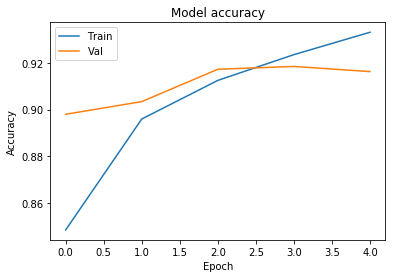

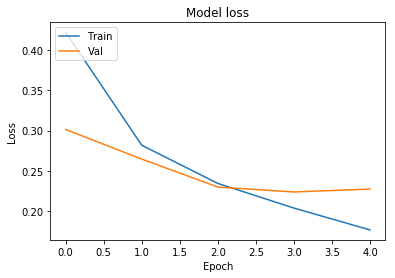

In [38]:
plot_training(history1)

### Model 2:

* Adding Dropout
* Adding 1 hidden layer

In [39]:
# Building model 2: - 2 conv layers, 2 hidden layers, dropout
model2 = Sequential()

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation = 'relu', input_shape=image_shape))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.5))
model2.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(256, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = 'softmax'))

# Preview the model summary
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1568)             

In [42]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
from keras.callbacks import ModelCheckpoint

checkpointer2 = ModelCheckpoint(filepath='model2.weights.best.hdf5', verbose = 1, save_best_only=True)

history2 = model2.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_valid, y_valid), 
                      callbacks=[checkpointer2])

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 145s 3ms/step - loss: 0.7187 - acc: 0.7326 - val_loss: 0.4001 - val_acc: 0.8554

Epoch 00001: val_loss improved from inf to 0.40011, saving model to model2.weights.best.hdf5
Epoch 2/5
55000/55000 [==============================] - 197s 4ms/step - loss: 0.4750 - acc: 0.8285 - val_loss: 0.3298 - val_acc: 0.8784

Epoch 00002: val_loss improved from 0.40011 to 0.32983, saving model to model2.weights.best.hdf5
Epoch 3/5
55000/55000 [==============================] - 168s 3ms/step - loss: 0.4219 - acc: 0.8481 - val_loss: 0.2967 - val_acc: 0.8904

Epoch 00003: val_loss improved from 0.32983 to 0.29672, saving model to model2.weights.best.hdf5
Epoch 4/5
55000/55000 [==============================] - 141s 3ms/step - loss: 0.3983 - acc: 0.8556 - val_loss: 0.2963 - val_acc: 0.8886

Epoch 00004: val_loss improved from 0.29672 to 0.29629, saving model to model2.weights.best.hdf5
Epoch 5/5
55000

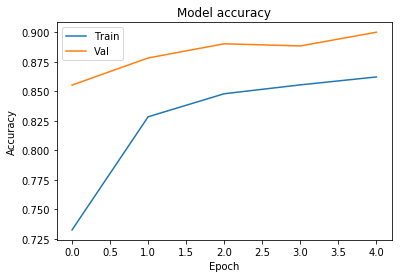

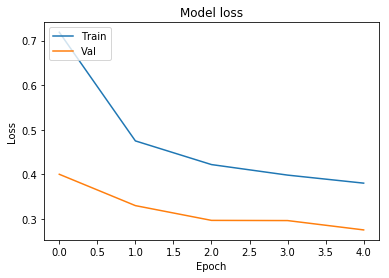

In [44]:
plot_training(history2)

### Model 3

* Adding convolutional layer
* Decreasing dropout rate

In [45]:
# Building model 3: - 3 conv layers, 3 hidden layers, dropout rate
model3 = Sequential()

model3.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation = 'relu', input_shape=image_shape))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.5))
model3.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model3.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(512, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(256, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(10, activation = 'softmax'))

# Preview the model summary
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 7, 7, 32)         

In [46]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
checkpointer3 = ModelCheckpoint(filepath='model3.weights.best.hdf5', verbose = 1, save_best_only=True)

history3 = model3.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_valid, y_valid), 
                      callbacks=[checkpointer3])

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 232s 4ms/step - loss: 0.6570 - acc: 0.7553 - val_loss: 0.3553 - val_acc: 0.8630

Epoch 00001: val_loss improved from inf to 0.35533, saving model to model3.weights.best.hdf5
Epoch 2/5
55000/55000 [==============================] - 262s 5ms/step - loss: 0.4146 - acc: 0.8537 - val_loss: 0.3155 - val_acc: 0.8870

Epoch 00002: val_loss improved from 0.35533 to 0.31553, saving model to model3.weights.best.hdf5
Epoch 3/5
55000/55000 [==============================] - 399s 7ms/step - loss: 0.3735 - acc: 0.8663 - val_loss: 0.2706 - val_acc: 0.9042

Epoch 00003: val_loss improved from 0.31553 to 0.27061, saving model to model3.weights.best.hdf5
Epoch 4/5
55000/55000 [==============================] - 1685s 31ms/step - loss: 0.3475 - acc: 0.8753 - val_loss: 0.2590 - val_acc: 0.9062

Epoch 00004: val_loss improved from 0.27061 to 0.25902, saving model to model3.weights.best.hdf5
Epoch 5/5
550

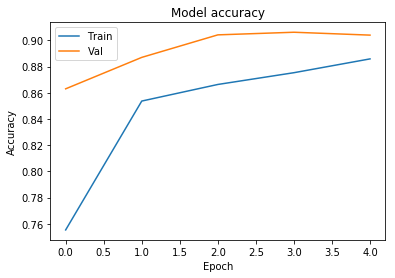

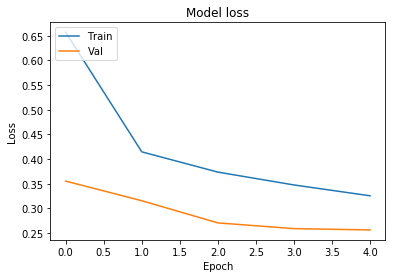

In [48]:
plot_training(history3)

### Hyperparameter Tuning w/ Talos

https://github.com/autonomio/talos/blob/master/examples/A%20Very%20Short%20Introduction%20to%20Hyperparameter%20Optimization%20of%20Keras%20Models%20with%20Talos.ipynb

In [49]:
import sys
import talos as ta

In [54]:
params = {'batch_size': [32, 64],
    'optimizer': ['adam', 'adadelta', 'rmsprop', 'sgd']
}

In [55]:
# add input parameters to the function
def tuned_model(x_train, y_train, x_valid, y_valid, params):
    
    model = Sequential()

    model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation = 'relu', input_shape=image_shape))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation = 'softmax'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    # make sure history object is returned by model.fit()
    out = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=params['batch_size'],
                    validation_split=.01,
                    verbose=1)
    
    return out, model

In [59]:
t = ta.Scan(x_train, y_train, params, tuned_model, experiment_name = 'example.csv')

  0%|          | 0/8 [00:00<?, ?it/s]

Train on 38115 samples, validate on 385 samples
Epoch 1/20
38115/38115 [==============================] - 170s 4ms/step - loss: 0.1205 - acc: 0.9522 - val_loss: 0.0646 - val_acc: 0.9738
Epoch 2/20
38115/38115 [==============================] - 162s 4ms/step - loss: 0.0778 - acc: 0.9697 - val_loss: 0.0531 - val_acc: 0.9779
Epoch 3/20
38115/38115 [==============================] - 145s 4ms/step - loss: 0.0693 - acc: 0.9728 - val_loss: 0.0498 - val_acc: 0.9808
Epoch 4/20
38115/38115 [==============================] - 150s 4ms/step - loss: 0.0647 - acc: 0.9750 - val_loss: 0.0527 - val_acc: 0.9800
Epoch 5/20
38115/38115 [==============================] - 329s 9ms/step - loss: 0.0619 - acc: 0.9758 - val_loss: 0.0505 - val_acc: 0.9800
Epoch 6/20
38115/38115 [==============================] - 147s 4ms/step - loss: 0.0595 - acc: 0.9766 - val_loss: 0.0443 - val_acc: 0.9834
Epoch 7/20
38115/38115 [==============================] - 143s 4ms/step - loss: 0.0578 - acc: 0.9775 - val_loss: 0.0460 - va

 12%|█▎        | 1/8 [2:11:45<15:22:18, 7905.43s/it]

Train on 38115 samples, validate on 385 samples
Epoch 1/20
38115/38115 [==============================] - 156s 4ms/step - loss: 0.1586 - acc: 0.9363 - val_loss: 0.0799 - val_acc: 0.9652
Epoch 2/20
38115/38115 [==============================] - 1319s 35ms/step - loss: 0.0953 - acc: 0.9615 - val_loss: 0.0717 - val_acc: 0.9688
Epoch 3/20
38115/38115 [==============================] - 153s 4ms/step - loss: 0.0825 - acc: 0.9674 - val_loss: 0.0566 - val_acc: 0.9779
Epoch 4/20
38115/38115 [==============================] - 146s 4ms/step - loss: 0.0745 - acc: 0.9706 - val_loss: 0.0650 - val_acc: 0.9732
Epoch 5/20
38115/38115 [==============================] - 145s 4ms/step - loss: 0.0697 - acc: 0.9727 - val_loss: 0.0564 - val_acc: 0.9784
Epoch 6/20
38115/38115 [==============================] - 141s 4ms/step - loss: 0.0669 - acc: 0.9739 - val_loss: 0.0474 - val_acc: 0.9808
Epoch 7/20
38115/38115 [==============================] - 568s 15ms/step - loss: 0.0639 - acc: 0.9750 - val_loss: 0.0438 -

 25%|██▌       | 2/8 [5:24:04<14:59:33, 8995.59s/it]

Train on 38115 samples, validate on 385 samples
Epoch 1/20
38115/38115 [==============================] - 761s 20ms/step - loss: 0.1209 - acc: 0.9528 - val_loss: 0.0669 - val_acc: 0.9738
Epoch 2/20
38115/38115 [==============================] - 544s 14ms/step - loss: 0.0864 - acc: 0.9671 - val_loss: 0.0658 - val_acc: 0.9730
Epoch 3/20
38115/38115 [==============================] - 756s 20ms/step - loss: 0.0816 - acc: 0.9693 - val_loss: 0.0547 - val_acc: 0.9787
Epoch 4/20
38115/38115 [==============================] - 776s 20ms/step - loss: 0.0826 - acc: 0.9695 - val_loss: 0.0549 - val_acc: 0.9771
Epoch 5/20
38115/38115 [==============================] - 597s 16ms/step - loss: 0.0834 - acc: 0.9697 - val_loss: 0.0517 - val_acc: 0.9803
Epoch 6/20
38115/38115 [==============================] - 929s 24ms/step - loss: 0.0868 - acc: 0.9688 - val_loss: 0.0561 - val_acc: 0.9797
Epoch 7/20
38115/38115 [==============================] - 151s 4ms/step - loss: 0.0897 - acc: 0.9677 - val_loss: 0.057

 38%|███▊      | 3/8 [7:11:12<11:25:26, 8225.36s/it]

Train on 38115 samples, validate on 385 samples
Epoch 1/20
38115/38115 [==============================] - 111s 3ms/step - loss: 0.3247 - acc: 0.9000 - val_loss: 0.3241 - val_acc: 0.9000
Epoch 2/20
38115/38115 [==============================] - 108s 3ms/step - loss: 0.3228 - acc: 0.9000 - val_loss: 0.3198 - val_acc: 0.9000
Epoch 3/20
38115/38115 [==============================] - 115s 3ms/step - loss: 0.3160 - acc: 0.9000 - val_loss: 0.2965 - val_acc: 0.9000
Epoch 4/20
38115/38115 [==============================] - 130s 3ms/step - loss: 0.2862 - acc: 0.8998 - val_loss: 0.2314 - val_acc: 0.9000
Epoch 5/20
38115/38115 [==============================] - 121s 3ms/step - loss: 0.2502 - acc: 0.9009 - val_loss: 0.1966 - val_acc: 0.9114
Epoch 6/20
38115/38115 [==============================] - 133s 3ms/step - loss: 0.2262 - acc: 0.9057 - val_loss: 0.1780 - val_acc: 0.9268
Epoch 7/20
38115/38115 [==============================] - 127s 3ms/step - loss: 0.2100 - acc: 0.9105 - val_loss: 0.1708 - va

 50%|█████     | 4/8 [7:48:48<7:08:57, 6434.40s/it] 

Train on 38115 samples, validate on 385 samples
Epoch 1/20
38115/38115 [==============================] - 142s 4ms/step - loss: 0.1331 - acc: 0.9471 - val_loss: 0.0707 - val_acc: 0.9704
Epoch 2/20
38115/38115 [==============================] - 129s 3ms/step - loss: 0.0830 - acc: 0.9669 - val_loss: 0.0542 - val_acc: 0.9774
Epoch 3/20
38115/38115 [==============================] - 133s 3ms/step - loss: 0.0717 - acc: 0.9718 - val_loss: 0.0490 - val_acc: 0.9826
Epoch 4/20
38115/38115 [==============================] - 129s 3ms/step - loss: 0.0652 - acc: 0.9745 - val_loss: 0.0480 - val_acc: 0.9810
Epoch 5/20
38115/38115 [==============================] - 123s 3ms/step - loss: 0.0611 - acc: 0.9758 - val_loss: 0.0427 - val_acc: 0.9821
Epoch 6/20
38115/38115 [==============================] - 963s 25ms/step - loss: 0.0577 - acc: 0.9771 - val_loss: 0.0461 - val_acc: 0.9818
Epoch 7/20
38115/38115 [==============================] - 159s 4ms/step - loss: 0.0555 - acc: 0.9782 - val_loss: 0.0435 - v

 62%|██████▎   | 5/8 [8:48:58<4:39:21, 5587.01s/it]

Train on 38115 samples, validate on 385 samples
Epoch 1/20
38115/38115 [==============================] - 3545s 93ms/step - loss: 0.1743 - acc: 0.9307 - val_loss: 0.0897 - val_acc: 0.9621
Epoch 2/20
38115/38115 [==============================] - 122s 3ms/step - loss: 0.1048 - acc: 0.9573 - val_loss: 0.0738 - val_acc: 0.9670
Epoch 3/20
38115/38115 [==============================] - 935s 25ms/step - loss: 0.0907 - acc: 0.9631 - val_loss: 0.0637 - val_acc: 0.9745
Epoch 4/20
38115/38115 [==============================] - 151s 4ms/step - loss: 0.0812 - acc: 0.9678 - val_loss: 0.0561 - val_acc: 0.9753
Epoch 5/20
38115/38115 [==============================] - 4859s 127ms/step - loss: 0.0758 - acc: 0.9700 - val_loss: 0.0505 - val_acc: 0.9787
Epoch 6/20
38115/38115 [==============================] - 124s 3ms/step - loss: 0.0711 - acc: 0.9717 - val_loss: 0.0499 - val_acc: 0.9813
Epoch 7/20
38115/38115 [==============================] - 936s 25ms/step - loss: 0.0671 - acc: 0.9739 - val_loss: 0.04

 75%|███████▌  | 6/8 [13:55:05<5:14:02, 9421.21s/it]

Train on 38115 samples, validate on 385 samples
Epoch 1/20
38115/38115 [==============================] - 140s 4ms/step - loss: 0.1315 - acc: 0.9485 - val_loss: 0.0723 - val_acc: 0.9699
Epoch 2/20
38115/38115 [==============================] - 850s 22ms/step - loss: 0.0834 - acc: 0.9673 - val_loss: 0.0556 - val_acc: 0.9782
Epoch 3/20
38115/38115 [==============================] - 146s 4ms/step - loss: 0.0738 - acc: 0.9716 - val_loss: 0.0567 - val_acc: 0.9753
Epoch 4/20
38115/38115 [==============================] - 133s 3ms/step - loss: 0.0700 - acc: 0.9732 - val_loss: 0.0470 - val_acc: 0.9829
Epoch 5/20
38115/38115 [==============================] - 128s 3ms/step - loss: 0.0667 - acc: 0.9747 - val_loss: 0.0490 - val_acc: 0.9821
Epoch 6/20
38115/38115 [==============================] - 126s 3ms/step - loss: 0.0660 - acc: 0.9748 - val_loss: 0.0475 - val_acc: 0.9813
Epoch 7/20
38115/38115 [==============================] - 3318s 87ms/step - loss: 0.0660 - acc: 0.9754 - val_loss: 0.0481 -

 88%|████████▊ | 7/8 [21:45:26<4:11:00, 15060.94s/it]

Train on 38115 samples, validate on 385 samples
Epoch 1/20
38115/38115 [==============================] - 129s 3ms/step - loss: 0.3254 - acc: 0.9000 - val_loss: 0.3244 - val_acc: 0.9000
Epoch 2/20
38115/38115 [==============================] - 162s 4ms/step - loss: 0.3248 - acc: 0.9000 - val_loss: 0.3237 - val_acc: 0.9000
Epoch 3/20
38115/38115 [==============================] - 166s 4ms/step - loss: 0.3242 - acc: 0.9000 - val_loss: 0.3228 - val_acc: 0.9000
Epoch 4/20
38115/38115 [==============================] - 148s 4ms/step - loss: 0.3232 - acc: 0.9000 - val_loss: 0.3210 - val_acc: 0.9000
Epoch 5/20
38115/38115 [==============================] - 133s 3ms/step - loss: 0.3216 - acc: 0.9000 - val_loss: 0.3174 - val_acc: 0.9000
Epoch 6/20
38115/38115 [==============================] - 139s 4ms/step - loss: 0.3176 - acc: 0.9000 - val_loss: 0.3075 - val_acc: 0.9000
Epoch 7/20
38115/38115 [==============================] - 149s 4ms/step - loss: 0.3064 - acc: 0.9000 - val_loss: 0.2792 - va

100%|██████████| 8/8 [22:32:10<00:00, 11384.10s/it]  


In [115]:
t.data

,round_epochs,val_loss,val_acc,loss,acc,batch_size,optimizer
0,20,0.038530,0.985195,0.046685,0.981913,32,adam
1,20,0.044797,0.982597,0.051113,0.980294,32,adadelta
2,20,0.069425,0.970390,0.128193,0.955309,32,rmsprop
3,20,0.116086,0.949610,0.145218,0.938591,32,sgd
4,20,0.034926,0.985714,0.042468,0.983526,64,adam
5,20,0.038515,0.984675,0.049021,0.980695,64,adadelta
6,20,0.058539,0.981299,0.074515,0.973735,64,rmsprop
7,20,0.151170,0.934026,0.180420,0.922498,64,sgd


This table shows us that the best parameters to use in our final model will be an Adam optimizer with a batch size of 64.

In [122]:
t.data.to_csv(r'final_params.csv')

### Final Model

In [84]:
final_model = Sequential()

final_model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation = 'relu', input_shape=image_shape))
final_model.add(MaxPooling2D(pool_size=2))
final_model.add(Dropout(0.5))
final_model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation = 'relu'))
final_model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation = 'relu'))
final_model.add(MaxPooling2D(pool_size=2))
final_model.add(Dropout(0.5))
final_model.add(Flatten())
final_model.add(Dense(512, activation = 'relu'))
final_model.add(Dropout(0.25))
final_model.add(Dense(256, activation = 'relu'))
final_model.add(Dropout(0.25))
final_model.add(Dense(128, activation = 'relu'))
final_model.add(Dropout(0.25))
final_model.add(Dense(64, activation = 'relu'))
final_model.add(Dropout(0.25))
final_model.add(Dense(10, activation = 'softmax'))

final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
final_history = final_model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=.01,
                    verbose=1)

Train on 54450 samples, validate on 550 samples
Epoch 1/20
54450/54450 [==============================] - 328s 6ms/step - loss: 0.7410 - acc: 0.7255 - val_loss: 0.4181 - val_acc: 0.8509
Epoch 2/20
54450/54450 [==============================] - 170s 3ms/step - loss: 0.4356 - acc: 0.8463 - val_loss: 0.3318 - val_acc: 0.8764
Epoch 3/20
54450/54450 [==============================] - 165s 3ms/step - loss: 0.3750 - acc: 0.8671 - val_loss: 0.2873 - val_acc: 0.8982
Epoch 4/20
54450/54450 [==============================] - 165s 3ms/step - loss: 0.3444 - acc: 0.8774 - val_loss: 0.2706 - val_acc: 0.8945
Epoch 5/20
54450/54450 [==============================] - 451s 8ms/step - loss: 0.3248 - acc: 0.8834 - val_loss: 0.2595 - val_acc: 0.9000
Epoch 6/20
54450/54450 [==============================] - 167s 3ms/step - loss: 0.3109 - acc: 0.8882 - val_loss: 0.2454 - val_acc: 0.9073
Epoch 7/20
54450/54450 [==============================] - 165s 3ms/step - loss: 0.3009 - acc: 0.8932 - val_loss: 0.2651 - va

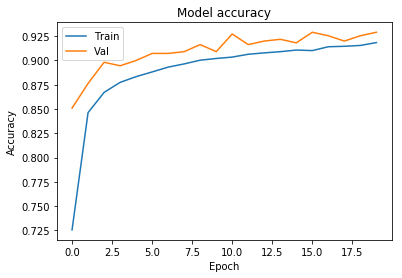

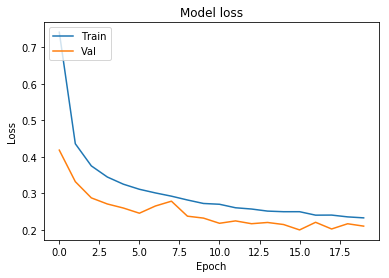

In [87]:
plot_training(final_history)

In [94]:
final_model.save('final_model.h5')

### Compare results with a pretrained network: VGG16

In [222]:
# Prep and reshape data for the use in a VGG16 model

x_train2 = x_train.reshape(60000, 784)
x_test2 = x_test.reshape(10000, 784)
x_valid2 = x_valid.reshape(5000, 784)

In [223]:
# Convert the images into 3 channels for use in VGG16 model

x_train2=np.dstack([x_train2] * 3)
x_test2=np.dstack([x_test2]*3)
x_valid2=np.dstack([x_valid2]*3)
x_train2.shape, x_test2.shape, x_valid2.shape

((60000, 784, 3), (10000, 784, 3), (5000, 784, 3))

In [224]:
# Reshape images as per the tensor format required by tensorflow
x_train2 = x_train2.reshape(-1, 28,28,3)
x_test2= x_test2.reshape(-1,28,28,3)
x_valid2 = x_valid2.reshape(-1,28,28,3)
x_train2.shape,x_test2.shape, x_valid2.shape

((60000, 28, 28, 3), (10000, 28, 28, 3), (5000, 28, 28, 3))

In [225]:
# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img
x_train2 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train2])
x_test2 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test2])
x_valid2 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_valid2])
#train_x = preprocess_input(x)
x_train2.shape, x_test2.shape, x_valid2.shape

((60000, 48, 48, 3), (10000, 48, 48, 3), (5000, 48, 48, 3))

In [226]:
x_train2 = x_train2 / 255.
x_test2 = x_test2 / 255.
x_valid2 = x_valid2 / 255.
x_train2 = x_train2.astype('float32')
x_test2 = x_test2.astype('float32')
x_valid2 = x_valid2.astype('float32')

In [227]:
# Converting Labels to one hot encoded format
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

In [228]:
# Splitting train data as train and validation data
train_X,valid_X,train_label,valid_label = train_test_split(x_train2,
                                                           train_Y_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

In [229]:
# Finally check the data size whether it is as per tensorflow and VGG16 requirement
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [230]:
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

In [231]:
# Preprocessing the input 
train_X = preprocess_input(train_X)
valid_X = preprocess_input(valid_X)
x_test2  = preprocess_input(x_test2)

In [234]:
from keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input

#  Create base model of VGG16
conv_base = VGG16(weights=None,
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [235]:
# Extracting features
train_features = vgg16.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = vgg16.predict(np.array(x_test2), batch_size=BATCH_SIZE, verbose=1)
val_features = vgg16.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)
#for layer in conv_base.layers:
#    layer.trainable = False

12000/12000 [==============================] - 354s 29ms/step


In [237]:
# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(48000, 1, 1, 512) 
 (10000, 1, 1, 512) 
 (12000, 1, 1, 512)


In [238]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [282]:
# Credit for the architecture of this model goes to:
# https://www.kaggle.com/anandad/classify-fashion-mnist-with-vgg16

In [239]:
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

pretrain_model = Sequential()
pretrain_model.add(Dense(512, activation='relu', input_dim=(1*1*512)))
pretrain_model.add(LeakyReLU(alpha=0.1))
pretrain_model.add(Dense(10, activation='softmax'))

In [240]:
# Compile the model.
pretrain_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['acc'])

In [243]:
# Incorporating reduced learning and early stopping for callback
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

In [244]:
pretrain_history = pretrain_model.fit(train_features_flat,
                    train_label,
                    epochs=NB_EPOCHS,
                    validation_data=(val_features_flat, valid_label),
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 12s 248us/step - loss: 1.4663 - acc: 0.4639 - val_loss: 1.2065 - val_acc: 0.5432
Epoch 2/100
48000/48000 [==============================] - 12s 242us/step - loss: 1.0898 - acc: 0.6003 - val_loss: 1.0654 - val_acc: 0.6179
Epoch 3/100
48000/48000 [==============================] - 11s 228us/step - loss: 0.9897 - acc: 0.6366 - val_loss: 0.9550 - val_acc: 0.6522
Epoch 4/100
48000/48000 [==============================] - 11s 229us/step - loss: 0.9313 - acc: 0.6596 - val_loss: 0.9724 - val_acc: 0.6457
Epoch 5/100
48000/48000 [==============================] - 11s 223us/step - loss: 0.9038 - acc: 0.6699 - val_loss: 0.9013 - val_acc: 0.6704
Epoch 6/100
48000/48000 [==============================] - 14s 292us/step - loss: 0.8818 - acc: 0.6738 - val_loss: 0.8750 - val_acc: 0.6853
Epoch 7/100
48000/48000 [==============================] - 12s

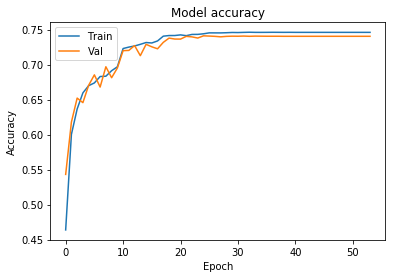

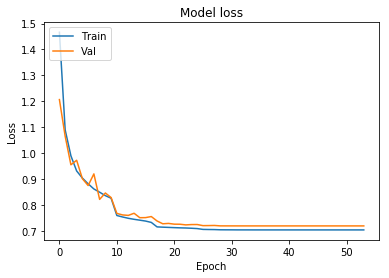

In [245]:
plot_training(pretrain_history)

## Part 5: Interpret

### Evaluation: Comparing Models

##### Model 1: test_loss: 0.1766 - test_acc: 0.9330 - val_loss: 0.2274 - val_acc: 0.9162

* Clearly this model created a good starting point with a very high validation accuracy score of nearly 92%. With a simple neural network, the data set can be classified accuratly. But, there is always room to improve. 

##### Model 2: test_loss: 0.3802 - test_acc: 0.8623 - val_loss: 0.2753 - val_acc: 0.9002

* It is interesting to see the validation accuracy decrease as we incorporated a dropout normalization and an addition hidden layer. This lower performance may increase if the epochs where to increase, giving the network more time to adjust weights and improve accuracy. 

##### Model 3: test_loss: 0.3256 - test_acc: 0.8859 - val_loss: 0.2564 - val_acc: 0.9040

* A slight uptick in performace and a decrease in the loss function, we see Model 3 performing around the same as model 2. Adjusting the dropout rate had little effect on the network's performance. However, and again, with more epochs and training time, my guess is that we would see an increase in performance. 

##### Pretrained VGG16 Model: test_loss: 0.7039 - test_acc: 0.7460 - val_loss: 0.7193 - val_acc: 0.7404

* Needing to make adjustments and tweaks to the data's shape may have degraded quality. In addition, rather than using a feature extraction method, we could try a freezing technique that would add in the VGG16 model as an initial layer with it's weights frozen and training the data on the entire network.

##### Final Model: test_loss: 0.2326 - test_acc: 0.9184 - val_loss: 0.2099 - val_acc: 0.9291

* Our final model performed the best. The near 92% accuracy within the test data and the near 93% accuracy on the validation data is in line with the results and scores of published models found here:

https://github.com/zalandoresearch/fashion-mnist#get-the-data

### An evaluation of the final model

Below is a test that 15 random images and shows whether they were classified correctly or not. We can use this in addition to a accuracy score for each category to see where our model will need improvements.

Credit to:
https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb

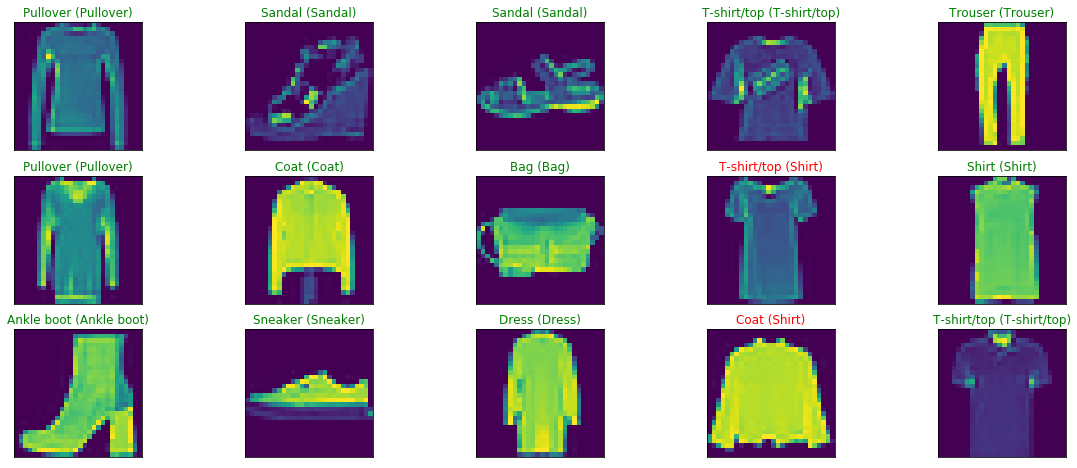

In [105]:
import numpy as np
y_hat = final_model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a



In [103]:

matrix = confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1))
c = 0
for i in sorted(test['label'].unique()):
    count = test[test['label'] == i].shape[0]
    correct = matrix[c][c]
    print("Label: " + str(i) + " --- Accuracy: " + str(round(correct/count, 3)))
    c += 1

Label: 0 --- Accuracy: 0.908
Label: 1 --- Accuracy: 0.983
Label: 2 --- Accuracy: 0.869
Label: 3 --- Accuracy: 0.942
Label: 4 --- Accuracy: 0.896
Label: 5 --- Accuracy: 0.989
Label: 6 --- Accuracy: 0.69
Label: 7 --- Accuracy: 0.981
Label: 8 --- Accuracy: 0.989
Label: 9 --- Accuracy: 0.962


In [104]:
fashion_mnist_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Notes on performance

 * We can see that this model performed the best on categorizing trousers, sandals, sneakers and bags.
 * The model performed worst on the shirt and pullover category. 

## Conclusion

Our final model showcased a performance that is in competition with published models on Kaggle. The Talos hyperparameter search was computationally expensive, but in the end allowed our model to be fully optimized for accuracy. With a 92% test accuracy and a 93% validation accuracy, we can be proud of the fact our CNN is performing at such a high level.  

## Future Work

### Things to explore:

* Experiment with the usage of other pretrained networks to see how performance can improve.
* Search for ways our model can decipher between coats and shirts and shirts and tops.
* Develop a sense of our final models greatest strengths and see if those parameters can be improved upon further. 
* Run our network at higher epoch levels to see what further training time can do to performance. 